![alt text](omega.png)

# <center> ZALEŻNOŚĆ STATYSTYCZNA UPORZĄDKOWANIA KATEGORII OD ZMIENNYCH NOMINALNYCH - Grzegorz Lissowski </center>


### Prawa autorskie

Niniejsza prezentacja w całości opiera się bądź jest dosłownym cytatem z wygłoszonego wrześniu 2014 roku przez __prof. Grzegorza Lissowskiego__ na konferencji w Jabłonnie referatu   dotyczącego nowej miary zależności statystycznej. Pełen opis proponowanej nowej miary zależności znajduje się w prezentacji: [ZALEŻNOŚĆ STATYSTYCZNA UPORZĄDKOWANIA KATEGORII OD ZMIENNYCH NOMINALNYCH](G_Lissowski_prezentacja.pdf).

slajd 12 - druga suma jest od k=i+1 do n, a nie do k

slajd 14 - bład  w mianowniku bo brakuje (-1)

# 1. Wstęp i omówienie przykładowego zagadnienia

Realizujemy badanie ankietowe, w którym respondenci mają za zadanie wybrać jedną partię, na którą oddaliby swój głos (gdyby wybory odbywały się w najbliższą niedzielę). Wynikiem takiego badania jest rozkład popoparia dla poszczególnych partii. Wyobraźmy sobie, że wygląda on następująco:

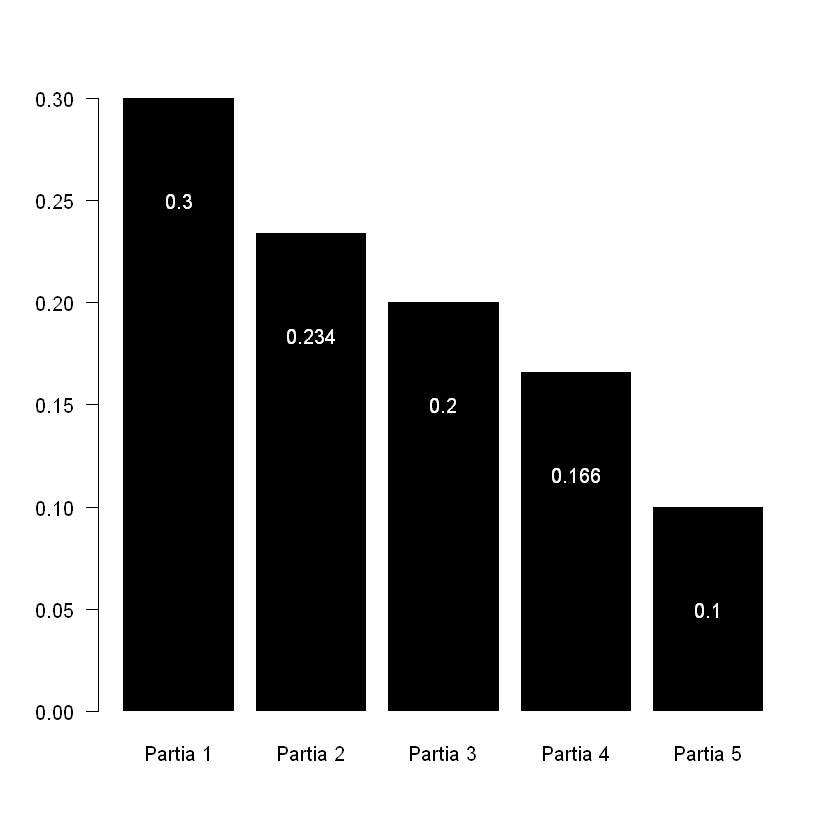

In [1]:
poparcie<-barplot(c(0.3, 0.234, 0.2, 0.166, 0.1),names.arg = c("Partia 1","Partia 2","Partia 3","Partia 4","Partia 5"), las=1, border = "transparent", col="black")
text( poparcie, c(0.3, 0.234, 0.2, 0.166, 0.1 )-0.05, labels = c(0.3, 0.234, 0.2, 0.166, 0.1), col="white")

Dodatkowo mamy jeszcze informację o drugiej zmiennej "dieta" - jest to dieta na jakiej aktualnie znajdują się respondenci.

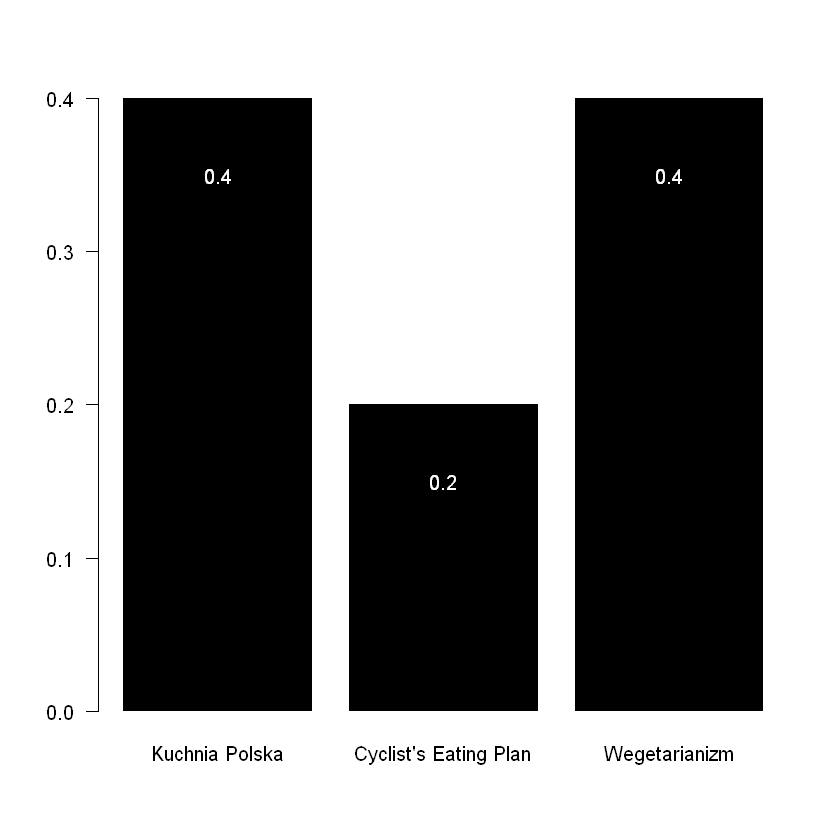

In [2]:
dieta<-barplot(c(0.4, 0.2, 0.4),names.arg = c("Kuchnia Polska","Cyclist's Eating Plan","Wegetarianizm"), las=1, border = "transparent", col="black")
text( dieta, c(0.4, 0.2, 0.4 )-0.05, labels = c(0.4, 0.2, 0.4), col="white")

Łączny rozkład tych zmiennych prezentuje się w następujący sposób:

In [3]:
rozklad_laczny<-
    matrix(
        c( 0.12, 0.08, 0.1,
           0.1,  0.05, 0.084,
           0.08, 0.04, 0.08,
           0.06, 0.03, 0.076,
           0.04, 0,    0.06),
        nrow = 5,
        ncol = 3,
        byrow = TRUE
    )
colnames(rozklad_laczny)<-c("Kuchnia Polska","Cyclist's Eating Plan","Wegetarianizm")
row.names(rozklad_laczny)<-c("Partia 1","Partia 2","Partia 3","Partia 4","Partia 5")
rozklad_laczny_brzegowy<-addmargins(rozklad_laczny)
colnames(rozklad_laczny_brzegowy)<-c("Kuchnia Polska","Cyclist's Eating Plan","Wegetarianizm", "RAZEM")
row.names(rozklad_laczny_brzegowy)<-c("Partia 1","Partia 2","Partia 3","Partia 4","Partia 5", "RAZEM")
rozklad_laczny_brzegowy


,Kuchnia Polska,Cyclist's Eating Plan,Wegetarianizm,RAZEM
Partia 1,0.12,0.08,0.10,0.30
Partia 2,0.100,0.050,0.084,0.234
Partia 3,0.08,0.04,0.08,0.20
Partia 4,0.060,0.030,0.076,0.166
Partia 5,0.04,0.00,0.06,0.10
RAZEM,0.4,0.2,0.4,1.0


Mamy więc dwie zmienne: "partię" oraz "dietę". O pierwszej z nich będziemy mówili, że jest to zmienna typu "wybór". Oznacza to, że zamiast badania pełnej preferencji na zbiorze opcji, respondenci musieli wybrać tylko jedną (wcale nie musi to być wybór najwyżej ocenianej opcji).  W efekcie otrzymaliśmy uporządkowanie opcji wyznaczone przez częstość ich wyboru. "Partia" jest zmienną nominalną, więc nie możemy mówić, że istnieje jakiś ustalony porządek jej kategorii. Uporządkowanie wynika tylko i wyłącznie z częstości występowania. Zmienna "dieta" również jest mierzona na skali nominalnej. Przyjmiemy, że jest to cecha respondentów. Nie mamy w tym przypadku doczynienia z preferencjami (każdy może być jednocześnie tylko na jednej diecie jednocześnie).

Skoro mamy dwie zmienne to oczywiście chcielibyśmy jakoś opisać występujące dla nich zależności. __Ale jak badać zależności między zmienną "wybór" (nominalną) i drugą zmienną nominalą?__.  Gdyby chodziło o zmienne porządkowe, skorzystalibyśmy pewnie z miary _tau Kendalla_. Tak jednak nie jest. Co możemy więc zrobić? 

# Wprowadzenie do nowej miary zależności

Prof. Lissowski ma następującą propozycję (cytat): 

"__Niezależność statystyczna__ _zmiennej X (typu „wybór”) od zmiennej Y (nominalnej) polega na tym, że takie same są uporządkowania częstości wyborów kategorii zmiennej X we wszystkich grupach badanych osób, wyróżnionych ze względu na zmienną Y._"

W naszym przykładzie niezależność zmiennych oznaczałaby, że uporządkowanie partii dla każdej diety jest takie samo:

__Kuchnia Polska:__

In [4]:
row.names(rozklad_laczny)[order(rozklad_laczny[,1], decreasing = TRUE)]

[1] "Partia 1" "Partia 2" "Partia 3" "Partia 4" "Partia 5"

__Cyclist's Eating Plan:__

In [5]:
row.names(rozklad_laczny)[order(rozklad_laczny[,2], decreasing = TRUE)]

[1] "Partia 1" "Partia 2" "Partia 3" "Partia 4" "Partia 5"

__Wegetarianizm:__

In [6]:
row.names(rozklad_laczny)[order(rozklad_laczny[,3], decreasing = TRUE)]

[1] "Partia 1" "Partia 2" "Partia 3" "Partia 4" "Partia 5"

I to się zgadza. We wszystkich przypadkach uporządkowanie partii jest takie samo. Definicja niezależności został dodatkowo opisana formalnie:

__Definicja 1.__

Zmienna X jest __niezależna statystycznie__ w powyższym sensie od zmiennej Y wtedy, gdy

$\forall y_g \in Y , \forall x_i , x_k \in X:$

$P(X=x_i | Y = y_g) < P(X=x_k | Y = y_g) \Leftrightarrow P(X=x_i) < P(X=x_k)$

$P(X=x_i | Y = y_g) = P(X=x_k | Y = y_g) \Leftrightarrow P(X=x_i) = P(X=x_k)$

$P(X=x_i | Y = y_g) > P(X=x_k | Y = y_g) \Leftrightarrow P(X=x_i) > P(X=x_k)$

co uzyskuje się w JUPYTERze używając następującego skryptu (jest to zapis stosowany w LATEX, ale ograniczony dodatkowo znakami \$...\$)

$\forall y_g \in Y , \forall x_i , x_k \in X:$

$P(X=x_i | Y = y_g) < P(X=x_k | Y = y_g) \Leftrightarrow P(X=x_i) < P(X=x_k)$

$P(X=x_i | Y = y_g) = P(X=x_k | Y = y_g) \Leftrightarrow P(X=x_i) = P(X=x_k)$

$P(X=x_i | Y = y_g) > P(X=x_k | Y = y_g) \Leftrightarrow P(X=x_i) > P(X=x_k)$
  

Analogicznie do niezależności statystycznej możemy mówić o maksymalne zależności statystycznej:

__"Maksymalna zależność statystyczna__ _zmiennej X (typu „wybór”) od zmiennej Y (nominalnej) oznacza (jak zawsze), że wszystkie osoby w każdej z wyróżnionych grup ze względu na zmienną Y wybierają tę samą kategorię zmiennej X"_.

__Definicja 2.__

$\forall y_g \in Y , \exists x_i \in X: P(X=x_i | Y = y_g)=1$

Dla naszego przykładu oznaczałoby to, że w przypadku wszystkich diet wybrano jedną i tą samą partię.

To tyle wprowadzenia. Wydaje mi się, że pomysł jest bardzo prosty. Zobaczymy jak będzie z wykonaniem.

# 3. Nowa miara zależności w praktyce

Aby zrozumieć nową miarę zależności musimy najpierw zrozumieć działanie dwóch starych miar: MD oraz MDA.

## 3.1. Miary MD i MDA

Miary MD oraz MDA opisują odpowiednio stopień roproszenia i koncentracji zmiennej. Musimy je omówić ponieważ stanowią one podstawowy składnik nowej miary statystycznej. 

###  3.1.1. MD czyli średnia różnica (mean difference)

MD - średnia różnica (mean difference) - zaproponował słynny Corrado Gini w 1912 r. jako miara rozproszenia. Zapisuje się ją wzorem:
 
$$MD(X)=\frac{1}{n(n-1)} \sum_{i=1}^n \sum_{k=1}^n |x_i-x_k|$$

Jak widać jest to średnia wartość różnic między wszystkimi możliwymi parami różnicami wartości X. Zauważmy, że zmienna X jest mierzona na skali ilorazowej. Dla naszych potrzeb możemy podstawić w jej miejsce czestości występowania czyli $P(X=x_i)$ lub prościej $p_i$. Otrzymamy wtedy: 

$$MD(X)=\frac{1}{n(n-1)} \sum_{i=1}^n \sum_{k=1}^n |p_i-p_k|$$

Niech $p_1 \geq p_2 \geq p_3 \geq ... \geq p_{n-1} \geq p_n$

Mając tak uporządkowane $P_i$ możemy wyznaczyćmacierz __D__, reprezentującą wartości bezwzględne różnic między wszystkimi parami częstości. Macierz __D__ zapisujemy jako:



$$D=\begin{bmatrix} 
  |p_1-p_1| & |p_1-p_2| & |p_1-p_3| & \cdots & |p_1-p_n|  \\ 
  |p_2-p_1| & |p_2-p_2| & |p_2-p_3| & \cdots & |p_2-p_n|  \\ 
  \cdots    & \cdots    & \cdots    & \cdots & \cdots \\
  \cdots    & \cdots    & \cdots    & \cdots & \cdots \\
  |p_n-p_1| & |p_n-p_2| & |p_n-p_3| & \cdots & |p_n-p_n|  \\ 
 \end{bmatrix}$$

Po chwili zastanowienia możemy uprościć macierz do następującej postaci (zera na przekątnej): 

$$D=\begin{bmatrix} 
  0 & |p_1-p_2| & |p_1-p_3| & \cdots & |p_1-p_n|  \\ 
  |p_2-p_1| & 0 & |p_2-p_3| & \cdots & |p_2-p_n|  \\ 
  \cdots    & \cdots    & \cdots    & \cdots & \cdots \\
  \cdots    & \cdots    & \cdots    & \cdots & \cdots \\
  |p_n-p_1| & |p_n-p_2| & |p_n-p_3| & \cdots & 0  \\ 
 \end{bmatrix}$$
 
Ale to nie wszystko. Zauważmy, że $|p_1-p_2|$ jest równe co do wartości $|p_2-p_1|$ ! Możemy więc zmodyfikować naszą macierz podstawiając pod $|p_2-p_1|$ wartość $|p_1-p_2|$. Przypomnijmy do tego, że $p_1 \geq p_2 \geq p_3 \geq ... \geq p_{n-1} \geq p_n$. Czyli $p_1-p_2$ będzie nieujemne. Możemy więc nawet pozbyć się wartości bezwzględnych i zostawić tylko $(p_1-p_2)$. Jeżeli taką operację przeprowadzimy w całej macierzy to otrzymamy macierz symetryczną (wartości pod przekątną są odbiciem lustrznym wartości nad przekątną):

$$D=\begin{bmatrix} 
  0 & (p_1-p_2) & (p_1-p_3) & \cdots & (p_1-p_n)  \\ 
  (p_1-p_2) & 0 & (p_2-p_3) & \cdots & (p_2-p_n)  \\ 
  \cdots    & \cdots    & \cdots    & \cdots & \cdots \\
  \cdots    & \cdots    & \cdots    & \cdots & \cdots \\
  (p_1-p_n) & (p_2-p_n) & (p_3-p_n) & \cdots & 0  \\ 
 \end{bmatrix}$$

Do dalszych rozważań przydatne będzie przyjęcie jeszcze jednego oznaczenia: $d_ik=|p_i- p_k|$. Macierz __D__ możemy wtedy zapisać jako: 

$$D=\begin{bmatrix} 
  0 & d_{12} & d_{13} & \cdots & d_{1n}  \\ 
  d_{21} & 0 & d_{23} & \cdots & d_{2n}  \\ 
  \cdots    & \cdots    & \cdots    & \cdots & \cdots \\
  \cdots    & \cdots    & \cdots    & \cdots & \cdots \\
  d_{n1} & d_{n2} & d_{n3} & \cdots & 0  \\ 
 \end{bmatrix}$$
 
 Przejdźmy do wyznaczania MD (średniej różnic). Policzmy najpierw sumą wartości wartości bewzględnych różnic częstości, którą oznaczymy jako  $\Delta. W przyjętym przez nas zapisie macierzy __D__:
 
$$\Delta = \sum_{i=1}^n \sum_{k=1}^n d_{ik} = \sum_{i=1}^n \sum_{k=1}^n |p_i-p_k|$$
 
Ponieważ, jak ustaliliśmy, możemy wyeliminować wartości bezwzględne z macierzy więc powyższą wartość można zapisać jako (pamiEtamy że macierz jest teraz symetryczna):


$$\Delta   = 2\sum_{i=1}^n (n-i)p_i - 2 \sum_{k=1}^n (i-1)p_i $$
 
$$\Delta =  2\sum_{i=1}^n (n-2i+1)p_i $$
 
$$\Delta =   2 \sum_{i=1}^n (n+1)p_i - 4 \sum_{i=1}^n ip_i $$

$$\Delta =  2(n+1) \sum_{i=1}^n p_i - 4 \sum_{i=1}^n ip_i $$
 
$$\Delta =  2(n+1)- 4 \sum_{i=1}^n ip_i$$

Zauważmy, że: 

 * jeżeli rozkład jest równomierny, tj. wszystkie częstości są równe $p_1 = p_2 = p_3 = ... = p_{n-1} = p_n = \frac{1}{n}$, to $\Delta=0$
 * jeżeli rozkład jest jednopunktowy, tj. występuje w nim skrajna koncentracja,$p_1 = 1, p_2 = p_3 = ... = p_{n-1} = p_n = 0$, to $\Delta=2(n-1)$

Wróćmy do miary MD. $MD(P)=\frac{1}{n(n-1)} \sum_{i=1}^n \sum_{k=1}^n |p_i-p_k|$. Pamiętając o uporządkowaniu P możemy 

Dla jeżeli podstawimy do wzoru wyznaczoną przed chwilą \Delta to otrzymamy $MD(X)=\frac{1}{n(n-1)} \sum_{i=1}^n \sum_{k=1}^n |x_i-x_k|$

Maksymalna wartość miary MD w wypadku skrajnej koncentracji jest równa 2/n, gdyż: 

$$MD_{max}(X) = \frac{\Delta_{max}}{n(n-1)} = \frac{2(n-1)}{n(n-1)}= \frac{2}{n}$$



Jeżeli pod sumę $\sum_{i=1}^n \sum_{k=1}^n |x_i-x_k|$ podstawimy teraz wyznaczoną wcześniej $\Delta$ to otrzymamy:


$$MD(X)=\frac{ 2(n+1)- 4 \sum_{i=1}^n ip_i}{n(n-1)}$$

A jeśli unormujemy tą wartość to otrzymamy niezbyt eleganckie wyrażenie: 

$$MD(X)=\frac{\frac{ 2(n+1)- 4 \sum_{i=1}^n ip_i}{n(n-1)}}{ \frac{2}{n} }$$

Które ostatecznie skraca się do prostego: 

$$MD(X)=\frac{ n+1- 2 \sum_{i=1}^n ip_i}{n-1}$$

Teraz miara MD przyjmuje wartości od 0 do 1:

 * wartość 0 – w wypadku rozkładu równomiernego
 * wartość 1 – w wypadku rozkładu, w którym jedna z kategorii występuje z częstością 1
 * miara ta jest równa skorygowanej mierze koncentracji (Ray i Singer 1973).

### 3.1.2. MDA - analog średniej różnicy (mean difference analog) 

Z punktu widzenia opisu badanego rozkładu częstości bardziej przydatna niż miara koncentracji (czyli MD) będzie miara różnorodności, dla której:

 * wartość 0 będzie oznaczać, że jedna z kategorii występuje z częstością 1; 
 * wartość 1 będzie oznaczać rozkład równomierny.
 
Innymi słowy im większa wartość miary tym bardziej zróżnicowany rozkład. Tego rodzaju własność posiada miara MDA (_mean difference analog_) analizowana przez Allena R. Wilcoxa (1973):

<center>$MDA(P) = 1 - \frac{\sum_{i=1}^{n-1} \sum_{k=i+1}^{n} |p_i - p_k|}{n-1} $</center>

__MDA__ otrzymujemy po odwróceniu unormowania miary MD:

$$1-MD(P) $$

czyli:

$$1 - \frac{n+1-2\sum_{i=1}^n ip_i}{n-1} $$

Żeby otrzymać równanie MDA z odwrotnie unormowanej miary MD wystarczy przekształcić licznik z ułamka w powyższym równaniu:

$$n+1-2\sum_{i=1}^n ip_i$$
$$(n+1)-2\sum_{i=1}^n ip_i$$
$$(n+1)\sum_{i=1}^n p_i-2\sum_{i=1}^n ip_i$$
$$ \sum_{i=1}^n(n+1)p_i-2 ip_i$$
$$ \sum_{i=1}^n np_i+p_i-ip_i-ip_i$$
$$ \sum_{i=1}^n np_i-ip_i-ip_i+p_i$$
$$\sum_{i=1}^n (n-i)p_i-(i-1)p_i$$

jeśli to rozpiszemy to otrzymamy:

$$ (p_1-p_2)+(p_1-p_3)+...+(p_1-p_n)+(p_2-p_3)+(p_2-p_4)+...+(p_2-p_n)+...+(p_{n-1}-p_n)$$

co (pamiętając o założeniu $p_1 \geq p_2 \geq p_3 \geq ... \geq p_{n-1} \geq p_n$) możemy zapisać jako:

$$\sum_{n-1}^{i=1} \sum_{n}^{k=i+1} (p_i - p_k) = \sum_{n-1}^{i=1} \sum_{n}^{k=i+1} |p_i - p_k|$$

a to jest składnik miary MDA więc ostatecznie otrzymujemy:

$$MDA(P) =  1 - \frac{\sum_{n-1}^{i=1} \sum_{n}^{k=i+1} |p_i - p_k|}{n-1}   =  1 - \frac{n+1-2\sum_{i=1}^n ip_i}{n-1}  =   1-MD(P) $$

Widzimy teraz wyraźnie, że __MDA__ otrzymuje się po odwróceniu unormowania miary __MD__. Możemy teraz zapisać __MDA__ jako: 

$$MDA(P) = 1 - \frac{n+1-2\sum_{i=1}^n ip_i}{n-1} = \frac{2(\sum_{i=1}^n ip_i -1  )}{n-1} $$

## 3.2. Nowa miara zależności statystycznej

Nowa miara zależności zmiennej X typu "wybór" od zmiennej nominalnej Y będzie oznaczana jako $\omega_{X|Y}$  i przyjmie następując postać:

$$\omega_{X|Y}=\frac{MDA(X)-E(MDA(X|Y))}{MDA(X)}$$

Czyli jest to różnica między wartością MDA dla rozkładu zmiennej X, a średnią wartością MDA dla rozkładu zmiennej X ze wszystkich kategorii zmiennej Y, podzielona dodatkowo przez wartość MDA dla rozkładu zmiennej X.

### 3.2.1. Ostateczna postać nowej miary zależności statystycznej

Żeby opisać czym jest __E(MDA(X|Y))__ potrzebna będzie mała zmiana oznaczeń. W równaniu MDA parametr _i_ (równy numerom obserwacji) będziemy teraz nazywać rangą. Przypomnijmy, że kategorie X są uporządkowane nierosnąco względem częstości występowania. Dla pierwszej, najczęściej występującej kategorii, i=1 dla następnej i=2 itd. Zatem parametr _i_ jest rangą. Teraz zmienimy jego oznaczenie i wprowadzimy dodatkowe wartości:

 * $r_i$ ranga częstości kategorii $x_i$ w uporządkowaniu nierosnącym w całej zbiorowości,
 * $r_{ig}$ ranga warunkowej częstości kategorii $x_i$ w uporządkowaniu nierosnącym w podzbiorowości {$Y=y_g$}.

Możemy teraz zapisać, że:

$$MDA(X) = \frac{2( \sum_{i=1}^n r_i P(X=x_i) -1) }{n-1}$$

$$MDA(X|Y=y_g) = \frac{2( \sum_{i=1}^n r_{ig}P(X=x_i|y=y_g) -1) }{n-1}$$

Czyli nowa miara zależności statystycznej przybiera (niewyraźną) postać: 

$$\omega_{X|Y} =  \frac{  \frac{2( \sum_{i=1}^n r_i P(X=x_i) -1) }{n-1} -  \sum_{g=1}^G P(Y=y_g)  \frac{2( \sum_{i=1}^n r_{ig}P(X=x_i|y=y_g) -1) }{n-1} }{ \frac{2( \sum_{i=1}^n r_i P(X=x_i) -1) }{n-1}  } $$

którą na szczęście możemy uprościć i istatecznie otrzymujemy:

$$\omega_{X|Y} =   \frac{ \sum_{i=1}^n r_i P(X=x_i)   -  \sum_{g=1}^G P(Y=y_g)   \sum_{i=1}^n r_{ig}P(X=x_i|y=y_g) }{ \sum_{i=1}^n r_i P(X=x_i) - 1} $$


"_Miara zależności przyjmuje wartość 0, gdy zmienna X jest niezależna statystycznie od zmiennej Y w sensie __Definicji 1__ oraz wartość 1, gdy jest maksymalnie zależna statystycznie_".

### 3.2.2. Twierdzenie o nowej miary zależności statystycznej

__Twierdzenie 1.__

Jeżeli zmienna X jest niezależna statystycznie od zmiennej Y w sensie __Definicji 1__, to $\omega_{X|Y}$ = 0.

Dowód:

$$\omega_{X|Y} =   \frac{ \sum_{i=1}^n r_i P(X=x_i)   -  \sum_{g=1}^G P(Y=y_g)   \sum_{i=1}^n r_{ig}P(X=x_i|y=y_g) }{ \sum_{i=1}^n r_i P(X=x_i)-1}$$

Skoro zmienna X jest niezależna statystycznie od zmiennej Y to wszystkie rangi $r_{ig}$ będą równe odpowiednim rangom $r_i$, bo uporządkowanie kategorii zmiennej X w rozkładach warunkowych będzie takie samo jak uporządkowanie kategorii samej zmiennej X. Formalnie zapisujemy to jako $y_g \in Y: r_{ig}=r_i$. To pozwala nam uprościć odjemnik w liczniku powyższego wyrażenia.

Odejminik:
$$\sum_{g=1}^G P(Y=y_g)   \sum_{i=1}^n r_{ig}P(X=x_i|y=y_g)$$
Zamiana $r_{ig}$ na $r_i$:
$$ \sum_{g=1}^G P(Y=y_g)   \sum_{i=1}^n r_{i}P(X=x_i|y=y_g)$$
Włączenie pod sumę po __i__ prawdopodobieństwa $P(Y=y_g)$: 
$$ \sum_{g=1}^G    \sum_{i=1}^n P(Y=y_g) r_{i} P(X=x_i|y=y_g)$$
Zamiania rozkładu warunkowego na łączny:
$$ \sum_{g=1}^G    \sum_{i=1}^n r_{i} P(X=x_i \land  y=y_g) $$
Zamiania kolejności sumowania:
$$    \sum_{i=1}^n \sum_{g=1}^G  r_{i} P(X=x_i \land  y=y_g) $$
Wyłączanie rangi $r_i$ przed sumę po _g_:
$$   \sum_{i=1}^n r_{i} \sum_{g=1}^G P(X=x_i \land  y=y_g) $$
Suma częstości z rozkładu łączengo dla wybranej kategorii zmiennej X po wszystkich kategoriach Y daje rozkład brzegowy X więc możemy napisać:
$$ \sum_{i=1}^n r_i P(X=x_i)$$

Przekształcony odejmnik podstawiamy do równania na $\omega_{X|Y}$, które zgodnie z tym co przewidywaliśmy będzie dawało w wyniku 0:
$$\omega_{X|Y} =   \frac{ \sum_{i=1}^n r_i P(X=x_i) - \sum_{i=1}^n r_i P(X=x_i) }{ \sum_{i=1}^n r_i P(X=x_i) - 1} = 0 $$

__Twierdzenie 2.__

Jeżeli dla każdej kategorii $x_i$ zmiennej X zachodzi równość między rangą tej kategorii w całej zbiorowości a średnią rang tej kategorii w podzbiorowościach wyróżnionych ze względu na zmienną Y, to miara zależności przyjmuje wartość 0.

Dowód.

Licznik miary zależności w zapisie uproszczonym ma następującą postać.

$$\sum_{i=1}^n r_i P(X=x_i) - \sum_{g=1}^G P(Y=y_g) \sum_{i=1}^n r_{ig}P(X=x_i|y=y_g)=$$
$$=\sum_{i=1}^n r_i P(X=x_i) - \sum_{i=1}^n \sum_{g=1}^G  r_{ig} P(X=x_i \land  y=y_g)=$$
$$=\sum_{i=1}^n r_i P(X=x_i) -  \sum_{i=1}^n \sum_{g=1}^G P(Y=x_i) r_{ig}P(X=x_i|y=y_g)=$$
$$=\sum_{i=1}^n r_i P(X=x_i) -  \sum_{i=1}^n \sum_{g=1}^G P(Y=x_i) r_{ig}P(X=x_i|y=y_g)=$$
$$=\sum_{i=1}^n P(X=x_i)[ r_i -  \sum_{g=1}^G r_{ig} P(X=x_i|y=y_g)]$$

Wyrażenie w nawiasie kwadratowym jest różnicą między rangą kategorii $x_i$ w całej zbiorowości a średnią rang tej kategorii w podzbiorowościach wyróżnionych ze względu na zmienną Y. Jeżeli dla każdej kategorii $x_i \in X$ jest
ono równe 0, to $ \omega_{X|Y} = 0$.

Czyli istnieją dwie sytuacje w których miara $\omega_{X|Y}$ przyjmuje wartość 0, z czego jedną jest niezależność statystyczna.

__Twierdzenie 3.__

Nowa miary zależności przyjmuje wartość 1, gdy zmienna X jest maksymalnie zależna statystycznie od zmiennej Y w sensie __Definicji 2__. 

Wystarczy zauważyć, że w tym wypadku wartość E[MDA(X|Y)] musi być równa 0. Tak może być jedynie wtedy, gdy każdy warunkowy rozkład zmiennej X ze względu na zmienną Y jest zerojedynkowy i w konsekwencji dla każdego $y_g \in Y: MDA(X|Y=y_g)=0$.

Dowód: 

Przypomnijmy, że zgodnie z __Definicją 2__ niezależność statystyczna zmiennej X od Y oznacza, że dla każdej kategorii Y tylko jedna kategoria X ma częstość niezerową (czyli tylko jedna kategoria jest wybierana, ale dla każdego Y to może być inna kategria).

To oznacza, że dla _g-tej_ kategorii Y:

$$\sum_{i=1}^n r_{ig}P(X=x_i|y=y_g)=1$$

bo niezależność powoduje, że dla _g-tej_ kategorii w powyższej sumie pierwsze prawdopodobieństwo przyjmie wartość 1, a pozostałe 0 więc otrzymamy:

$$1\cdot 1 + 2 \cdot 0 + 3 \cdot 0 + ... n \cdot 0 = 1$$

Możemy więc 1 podstawić zamias sumy do wzoru:

$$\omega_{X|Y} = \frac{ \sum_{i=1}^n r_i P(X=x_i) - \sum_{g=1}^G P(Y=y_g) \cdot 1 }{ \sum_{i=1}^n r_i P(X=x_i)-1}$$

oczywiście możemy pominąć 1 i wtedy zostaje: 

$$\omega_{X|Y} = \frac{ \sum_{i=1}^n r_i P(X=x_i) - \sum_{g=1}^G P(Y=y_g) }{ \sum_{i=1}^n r_i P(X=x_i)-1}$$

skoro tak, to zauważmy, że $\sum_{g=1}^G P(Y=y_g)=1$, a to daje nam:

$$\omega_{X|Y} = \frac{ \sum_{i=1}^n r_i P(X=x_i) - 1 }{ \sum_{i=1}^n r_i P(X=x_i)-1} = 1$$

Czyli udowodniliśmy, że niezależność zmiennych X i Y skutkuje przyjęciem przez miarę $\omega_{X|Y}$ wartości 1.

# 4. Przykłady działania nowej miary

Przejdźmy do praktycznych przykładów, które mam nadzieję wyjaśnią wszystkie niejasności związane z działaniem nowej miary zależność $\omega_{X|Y}$.

## 4.1 Przypomnienie nowej miary

Zacznijmy od szybkiego przypomnienia, że zajmujemy się zależnością statystyczną między zmiennej X (typu „wybór” - nominalnej) od zmiennej Y (nominalnej). Dla tego typu zmiennych zdefiniowaliśmy, że:    

 * __Niezależność statystyczna__ zmiennej X (typu „wybór”) od zmiennej Y (nominalnej) polega na tym, że takie same są uporządkowania częstości wyborów kategorii zmiennej X we wszystkich grupach badanych osób, wyróżnionych ze względu na zmienną Y.
 * __Maksymalna zależność statystyczna__ zmiennej X (typu „wybór”) od zmiennej Y (nominalnej) oznacza (jak zawsze), że wszystkie osoby w każdej z wyróżnionych grup ze względu na zmienną Y wybierają tę samą kategorię zmiennej X.

Dla przypomnienia nowa miara zależności ma postać:

$$\omega_{X|Y} =   \frac{ \sum_{i=1}^n r_i P(X=x_i)   -  \sum_{g=1}^G P(Y=y_g)   \sum_{i=1}^n r_{ig}P(X=x_i|y=y_g) }{ \sum_{i=1}^n r_i P(X=x_i)-1}$$

gdzie: 

 * $r_i$ ranga częstości kategorii $x_i$ w uporządkowaniu nierosnącym w całej zbiorowości,
 * $r_{ig}$ ranga warunkowej częstości kategorii $x_i$ w uporządkowaniu nierosnącym w podzbiorowości {$Y=y_g$}.

__Miara zależności__ przyjmuje wartość __0, gdy zmienna X jest niezależna__ statystycznie od zmiennej Y  oraz wartość __1, gdy jest maksymalnie zależna__ statystycznie. Przy czym:


## 4.2 Przykład niezależności zmiennej X od Y dla nowej miary zależności

Przypomnijmy czym jest niezależność statystyczna dla zmiennej typu wybór od innej zmiennej nominalnej:

"Niezależność statystyczna zmiennej X (typu „wybór”) od zmiennej Y (nominalnej) polega na tym, że takie same są uporządkowania częstości wyborów kategorii zmiennej X we wszystkich grupach badanych osób, wyróżnionych ze względu na zmienną Y."

Nowa miary zależności $\omega_{X|Y}$ przyjmuje wartość 0, gdy zmienna X jest niezależna statystycznie od zmiennej Y w sensie powyższej definicji niezależności. 

Za przykład przyjmijmy następujący rozkład łączny częstości zmiennych X i Y:

In [7]:
niezaleznosc<-matrix(
    c(0.12, 0.08, 0.1,
      0.1,  0.05, 0.084,
      0.08, 0.04, 0.08,
      0.06, 0.03, 0.076,
      0.04, 0,    0.06
    ),    nrow = 5,    ncol = 3,    byrow = TRUE
)
niezaleznosc_brzegowy<-addmargins(niezaleznosc)
colnames(niezaleznosc_brzegowy)<-c("y1", "y2", "y3", "RAZEM")
rownames(niezaleznosc_brzegowy)<-c("x1", "x2", "x3", "x4", "x5", "RAZEM")
niezaleznosc_brzegowy

,y1,y2,y3,RAZEM
x1,0.12,0.08,0.10,0.30
x2,0.100,0.050,0.084,0.234
x3,0.08,0.04,0.08,0.20
x4,0.060,0.030,0.076,0.166
x5,0.04,0.00,0.06,0.10
RAZEM,0.4,0.2,0.4,1.0


Zatem rozkład warunkowy częstości X|Y ma następującą postać:

In [8]:
niezaleznosc_y<-addmargins( prop.table(niezaleznosc,2),1) 
colnames(niezaleznosc_y)<-c("y1", "y2", "y3")
rownames(niezaleznosc_y)<-c("x1", "x2", "x3", "x4", "x5", "RAZEM")
niezaleznosc_y

,y1,y2,y3
x1,0.30,0.40,0.25
x2,0.25,0.25,0.21
x3,0.2,0.2,0.2
x4,0.15,0.15,0.19
x5,0.10,0.00,0.15
RAZEM,1,1,1


Od razu możemy zauważyć, że warunkowe uporządowakowanie kategorii zmiennej X jest dla wszystkich kategorii Y takie samo.  

In [9]:
# Uporzadkowanie kategorii X dla pierwszej, drugiej i trzeciej katogorii zmiennej Y
# W tabeli numery zmienne X zostały posortowane od największej do najmniejszej częstości
apply( prop.table(niezaleznosc,2), MARGIN = 2, order, decreasing = TRUE )

1,1,1
2,2,2
3,3,3
4,4,4
5,5,5


Oznacza to, że w myśl wcześniej prezentowanej definicji, zmienna X jest niezależna statystycznie od zmiennej Y.

Teraz możemy się zastanowić nad tym jak, w tej sytuacji zachowa się nowa miara zależności: 

$$\omega_{X|Y} =   \frac{ \sum_{i=1}^n r_i P(X=x_i)   -  \sum_{g=1}^G P(Y=y_g)   \sum_{i=1}^n r_{ig}P(X=x_i|y=y_g) }{ \sum_{i=1}^n r_i P(X=x_i)-1}$$

Zacznijmy od wyznaczenia najprostrzego elementu tej miary czyli $\sum_{i=1}^n r_i P(X=x_i)$ (korzystamy z rozkładu brzegowego zmiennej X i rang przypisanych częstościom):

$$\sum_{i=1}^n r_i P(X=x_i) = 1 \cdot 0.3 + 2 \cdot 0.234 + 3 \cdot 0.2 + 4 \cdot 0.166 + 5 \cdot 0.1 = 2.532
$$

Teraz zajmijmy się odejmnikiem $\sum_{g=1}^G P(Y=y_g) \sum_{i=1}^n r_{ig}P(X=x_i|y=y_g)$. Zauważmy, że wyrażenie przeypomina średnią: dla każdej kategorii zmiennej Y wyznaczamy pewną wartość ze względu na warunkowe częstości zmiennej X, a potem mnożymy ją przez częstość kategorii Y. 

Aby wyznaczyć odejmnik potrzebny będzie rozkład warunkowy częstości X|Y:

In [10]:
niezaleznosc_y

,y1,y2,y3
x1,0.30,0.40,0.25
x2,0.25,0.25,0.21
x3,0.2,0.2,0.2
x4,0.15,0.15,0.19
x5,0.10,0.00,0.15
RAZEM,1,1,1


oraz odpawiadające mu rangi kategorii zmiennej X:

In [11]:
apply( prop.table(niezaleznosc,2), MARGIN = 2, 
      function(x) {
          kolej<-order(x,decreasing = TRUE)
          ranga<-(1:length(kolej))[ order(kolej)]
          return(ranga)
      }
)

1,1,1
2,2,2
3,3,3
4,4,4
5,5,5


Na tej podstawie możemy policzyć:

In [12]:
# Dla Y=y_1
1 * 0.30 + 2 * 0.25 + 3 * 0.2 + 4 * 0.15 + 5 * 0.10

[1] 2.5

In [13]:
# Dla Y=y_2
1 * 0.40 + 2 * 0.25 + 3 * 0.2 + 4 * 0.15 + 5 * 0.00

[1] 2.1

In [14]:
# Dla Y=y_3
1 * 0.25 + 2 * 0.21 + 3 * 0.2 + 4 * 0.19 + 5 * 0.15

[1] 2.78

Teraz możemy wykorzystać otrzymane wartości iloczynów rang oraz częstości i podstawić je do równania, w którym wykorzystujemy rozkład brzegowy Y: 

In [15]:
niezaleznosc_brzegowy[6,]

y1    y2    y3 RAZEM 
  0.4   0.2   0.4   1.0

$$\sum_{g=1}^G P(Y=y_g) \sum_{i=1}^n r_{ig}P(X=x_i|y=y_g) = 0.4 \cdot 2.5  + 0.2 \cdot 2.1+ 0.4 \cdot 2.78 = 2.532
$$

Następnie podstawiamy do równania nowej miary zależności statystycznej $\omega_{X|Y}$ wszystkie wyznaczone wcześniej wartości i otrzymujemy: 

$$\omega_{X|Y} =   \frac{ \sum_{i=1}^n r_i P(X=x_i)   -  \sum_{g=1}^G P(Y=y_g)   \sum_{i=1}^n r_{ig}P(X=x_i|y=y_g) }{ \sum_{i=1}^n r_i P(X=x_i)-1} = \frac{2.532- 2.532}{2.532 - 1} = 0$$

Czyli zgodnie z założeniami miara $\omega_{X|Y}$ przyjęła wartość 0 w sytuacji, gdy zmienna X jest niezalażna od zmiennej Y zgodnie z przyjętą definicją.

## 4.3 Przykład maksymalnej zależności zmiennej X od Y dla nowej miary zależności

Przypomnijmy czym jest niezależność statystyczna dla zmiennej typu wybór od innej zmiennej nominalnej:

__Maksymalna zależność statystyczna__ zmiennej X (typu „wybór”) od zmiennej Y (nominalnej) oznacza (jak zawsze), że wszystkie osoby w każdej z wyróżnionych grup ze względu na zmienną Y wybierają tę samą kategorię zmiennej X.

Nowa miary zależności $\omega_{X|Y}$ przyjmuje wartość 1, gdy zmienna X jest maksymalnie zależna statystycznie od zmiennej Y w sensie powyższej definicji niezależności. 

Za przykład przyjmijmy następujący rozkład łączny częstości zmiennych X i Y:

In [16]:
zaleznosc_max<-matrix(
    c(.2, 0,   0,
      0,   .3, 0,
      0,   0,   .5,
      0,   0,   0,
      0,   0,   0
    ),    nrow = 5,    ncol = 3,    byrow = TRUE
)
zaleznosc_max_brzegowy<-round(addmargins(zaleznosc_max),2)
colnames(zaleznosc_max_brzegowy)<-c("y1", "y2", "y3", "RAZEM")
rownames(zaleznosc_max_brzegowy)<-c("x1", "x2", "x3", "x4", "x5", "RAZEM")
zaleznosc_max_brzegowy

,y1,y2,y3,RAZEM
x1,0.2,0.0,0.0,0.2
x2,0.0,0.3,0.0,0.3
x3,0.0,0.0,0.5,0.5
x4,0,0,0,0
x5,0,0,0,0
RAZEM,0.2,0.3,0.5,1.0


Zatem rozkład warunkowy częstości X|Y ma następującą postać:

In [17]:
zaleznosc_max_y<-addmargins( prop.table(zaleznosc_max,2),1) 
colnames(zaleznosc_max_y)<-c("y1", "y2", "y3")
rownames(zaleznosc_max_y)<-c("x1", "x2", "x3", "x4", "x5", "RAZEM")
zaleznosc_max_y

,y1,y2,y3
x1,1,0,0
x2,0,1,0
x3,0,0,1
x4,0,0,0
x5,0,0,0
RAZEM,1,1,1


Od razu możemy zauważyć, że warunkowe uporządowakowanie kategorii zmiennej X jest dla wszystkich kategorii Y jest inne.

In [18]:
# Uporzadkowanie kategorii X dla pierwszej, drugiej i trzeciej katogorii zmiennej Y
# W tabeli numery zmienne X zostały posortowane od największej do najmniejszej częstości
apply( prop.table(zaleznosc_max,2), MARGIN = 2, order, decreasing = TRUE )

1,2,3
2,1,1
3,3,2
4,4,4
5,5,5


Rozkład warunkowy częstości X|Y pozwala nam stwierdzić, że wszystkie osoby w każdej z wyróżnionych grup ze względu na zmienną Y wybierają tę samą kategorię zmiennej X. To oznacza, że zmienna X jest niezależna od zmiennej Y.

Teraz możemy się zastanowić nad tym jak, w tej sytuacji zachowa się nowa miara zależności: 

$$\omega_{X|Y} =   \frac{ \sum_{i=1}^n r_i P(X=x_i)   -  \sum_{g=1}^G P(Y=y_g)   \sum_{i=1}^n r_{ig}P(X=x_i|y=y_g) }{ \sum_{i=1}^n r_i P(X=x_i)-1}$$

Zacznijmy od wyznaczenia najprostrzego elementu tej miary czyli $\sum_{i=1}^n r_i P(X=x_i)$ (korzystamy z rozkładu brzegowego zmiennej X i rang przypisanych częstościom):

$$\sum_{i=1}^n r_i P(X=x_i) = 1 \cdot 0.5 + 2 \cdot 0.3 + 3 \cdot 0.2 + 4 \cdot 0 + 5 \cdot 0 = 1.7
$$

Teraz zajmijmy się odejmnikiem $\sum_{g=1}^G P(Y=y_g) \sum_{i=1}^n r_{ig}P(X=x_i|y=y_g)$. Aby wyznaczyć jego wartość potrzebny będzie rozkład warunkowy częstości X|Y:

In [19]:
zaleznosc_max_y

,y1,y2,y3
x1,1,0,0
x2,0,1,0
x3,0,0,1
x4,0,0,0
x5,0,0,0
RAZEM,1,1,1


oraz odpawiadające mu rangi kategorii zmiennej X:

In [20]:
apply( prop.table(zaleznosc_max,2), MARGIN = 2, 
      function(x) {
          kolej<-order(x,decreasing = TRUE)
          ranga<-(1:length(kolej))[ order(kolej)]
          return(ranga)
      }
)

1,2,2
2,1,3
3,3,1
4,4,4
5,5,5


Na tej podstawie możemy policzyć:

In [21]:
# Dla Y=y_1
1*1+2*0+3*0+4*0+5*0

[1] 1

In [22]:
# Dla Y=y_2
2*0+1*1+3*0+4*0+5*0

[1] 1

In [23]:
# Dla Y=y_3
2*0+3*0+1*1+4*0+5*0

[1] 1

Teraz możemy wykorzystać otrzymane wartości iloczynów rang oraz częstości i podstawić je do równania, w którym wykorzystujemy rozkład brzegowy Y: 

In [24]:
zaleznosc_max_brzegowy[6,]

y1    y2    y3 RAZEM 
  0.2   0.3   0.5   1.0

$$\sum_{g=1}^G P(Y=y_g) \sum_{i=1}^n r_{ig}P(X=x_i|y=y_g) = 0.2 \cdot 1  + 0.3 \cdot 1 + 0.5 \cdot 1 = 1
$$

Następnie podstawiamy do równania nowej miary zależności statystycznej $\omega_{X|Y}$ wszystkie wyznaczone wcześniej wartości i otrzymujemy: 

$$\omega_{X|Y} =   \frac{ \sum_{i=1}^n r_i P(X=x_i)   -  \sum_{g=1}^G P(Y=y_g)   \sum_{i=1}^n r_{ig}P(X=x_i|y=y_g) }{ \sum_{i=1}^n r_i P(X=x_i)-1} = \frac{1.7- 1}{1.7 - 1} = 1$$

Czyli zgodnie z założeniami miara $\omega_{X|Y}$ przyjęła wartość 1 w sytuacji, gdy zmienna X jest maksymalnie zależna od zmiennej Y zgodnie z przyjętą definicją.

## 4.4 Inne przykłady zależności zmiennej X od Y dla nowej miary zależności  z użyciem algorytm w R 

Na potrzeby przykładu zastosowany zostanie alogorytm napisany w R, który będzie obliczał wartość nowej miary zależności, na trochę innych zasadach nich miało to miejce powyżej. 

Algorytm będzie korzstał z miary MDA (gdzie wartości $p_i$ są uporządkowane nierosnąco):

$$MDA(P) = \frac{2(\sum_{i=1}^n ip_i -1  )}{n-1} $$

Nową miarę zależności można zapisać z wykorzystaniem miary MDA w następujący sposób: 

$$\omega_{X|Y}=\frac{MDA(X)-E(MDA(X|Y))}{MDA(X)}$$

gdzie: 

$$E(MDA(X|Y)) = \sum_{i=i}^n P(Y_i) \cdot MDA(X|Y_i)$$

Poniżej znajduje funkcja R wyko....

In [25]:
# funckcja MDA
MDA<- function( x ) {  
   x<-as.vector(x) 
  x<-x[order(x, decreasing = TRUE)] # uporzadkowanie nierosnace wektora x  
  return( ((sum (x*(1:length(x)))-1)*2 )/( length(x)-1) )  
}
# nowa miara zaleznosci
OMEGA_MDA<-function( M ){
    mda_kolumny<-apply( prop.table ( M , 2), 2, MDA)
    srednie_mda<-sum(mda_kolumny*colSums( M ))
    MDA_X<-MDA(rowSums( M ))
    return(round( (MDA_X-srednie_mda)/MDA_X,7))
}

Dla porównania wyników nowej miary zastosowana zostanie entropia jako miara roproszenia:

$$ H(P=p_i)=-\sum_{i=1}^np_i \log p_i$$

Miara entropii ma następujące własności:

 * $0 \leq H(P=p_i) \leq \log n$
 * $H(P=p_i)=0$ wtedy i tylko wtedy gdy $p_j=1$ dla penego i (czyli $p_i=0$ dla każdego $i\neq j$)
 * $H(P=p_i)= \log n$ wtedy i tylko wtedy gdy dla każdego $i: p_i = \frac{1}{n}$

In [26]:
entropia<-function(x){
    x<-as.vector(x[x>0] )
    return( -sum(x*log(x) ) )
}

### 4.4.1 Analiza wrażliwośći nowej miary dla przykładowego rozkładu zmiennych

In [27]:
przyklad<-
    matrix(
        c( 0.25, 0,    0,    0,
           0,    0.25, 0,    0,
           0,    0,    0.25, 0,
           0,    0,    0,    0.25),
        nrow = 4,
        ncol = 4,
        byrow = TRUE
    )
przyklad

omega_znak<-"\u03C9"

cat("ą" )
paste( omega_znak, stri_enc_toutf8("Wartość") )
cat(c("Wartość dla nowej miary zależności Omega wynosi", omega_znak ))
cat( paste("Wartość dla nowej miary zależności Omega wynosi", omega_znak, ":", OMEGA_MDA(przyklad)))
cat( "\nWartość entropi dla przykładowej macierzy wynosi:", entropia(przyklad))



0.25,0.00,0.00,0.00
0.00,0.25,0.00,0.00
0.00,0.00,0.25,0.00
0.00,0.00,0.00,0.25


Ä…

ERROR: Error in paste(omega_znak, stri_enc_toutf8("WartoĹ›Ä‡")): nie udało się znaleźć funkcji 'stri_enc_toutf8'


WartoĹ›Ä‡ dla nowej miary zaleĹĽnoĹ›ci Omega wynosi <U+03C9>WartoĹ›Ä‡ dla nowej miary zaleĹĽnoĹ›ci Omega wynosi <U+03C9> : 1
WartoĹ›Ä‡ entropi dla przykĹ‚adowej macierzy wynosi: 1.386294

Symulacja: 

 * jako warunki początkowe przyjęto powyższy rozkład przykładowy;
 * jako warunki końcowe przyjęto rozkład równomierny
 


Warning message:
In title(...): niepowodzenie konwersji 'Ď‰' w 'mbcsToSbcs': kropka zastąpiona <cf>Warning message:
In title(...): niepowodzenie konwersji 'Ď‰' w 'mbcsToSbcs': kropka zastąpiona <89>

0.0625,0.0625,0.0625,0.0625
0.0625,0.0625,0.0625,0.0625
0.0625,0.0625,0.0625,0.0625
0.0625,0.0625,0.0625,0.0625


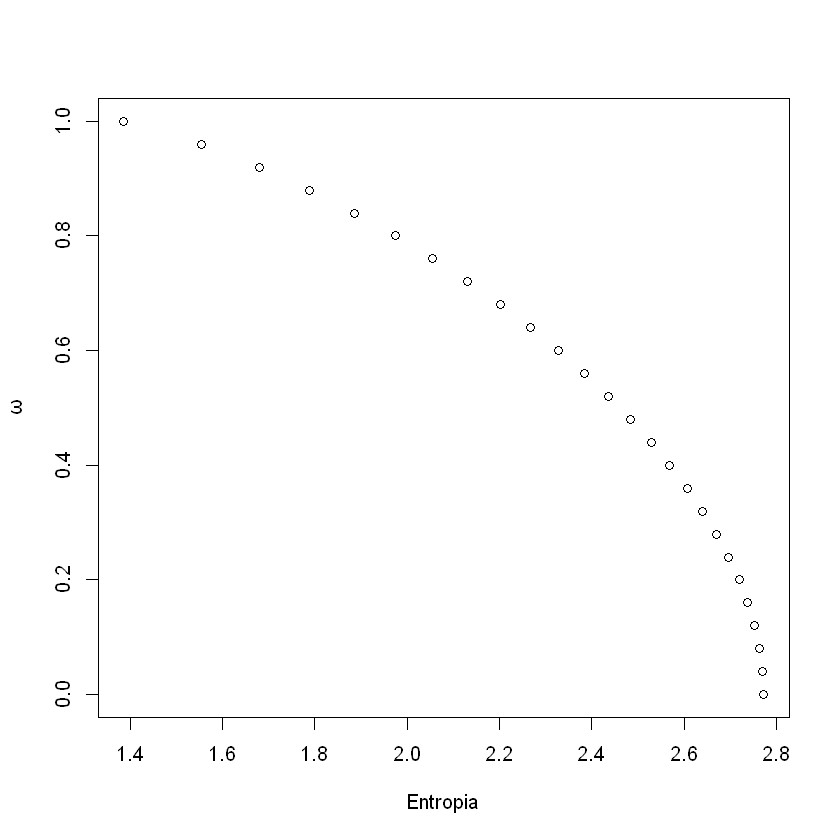

In [28]:
suma<-c()
wynik<-c()
wynik_e<-c()
for (i in 0:25 ) {
    macierz<-przyklad+.0075/3*i*(przyklad==0)-.0075*i*(przyklad>0)
    wynik[i+1]<-OMEGA_MDA( macierz)
    wynik_e[i+1]<-entropia( macierz)
    suma[i+1]<-sum(macierz)
    #print(macierz)
}
plot( wynik_e,     wynik , xlab= "Entropia", ylab=intToUtf8(0x03C9L))
macierz

### 4.4.2. Rozkład wyników dla próby losowanej z rozkładu niezależnego

,y1,y2,y3,RAZEM
x1,0.12,0.08,0.10,0.30
x2,0.100,0.050,0.084,0.234
x3,0.08,0.04,0.08,0.20
x4,0.060,0.030,0.076,0.166
x5,0.04,0.00,0.06,0.10
RAZEM,0.4,0.2,0.4,1.0


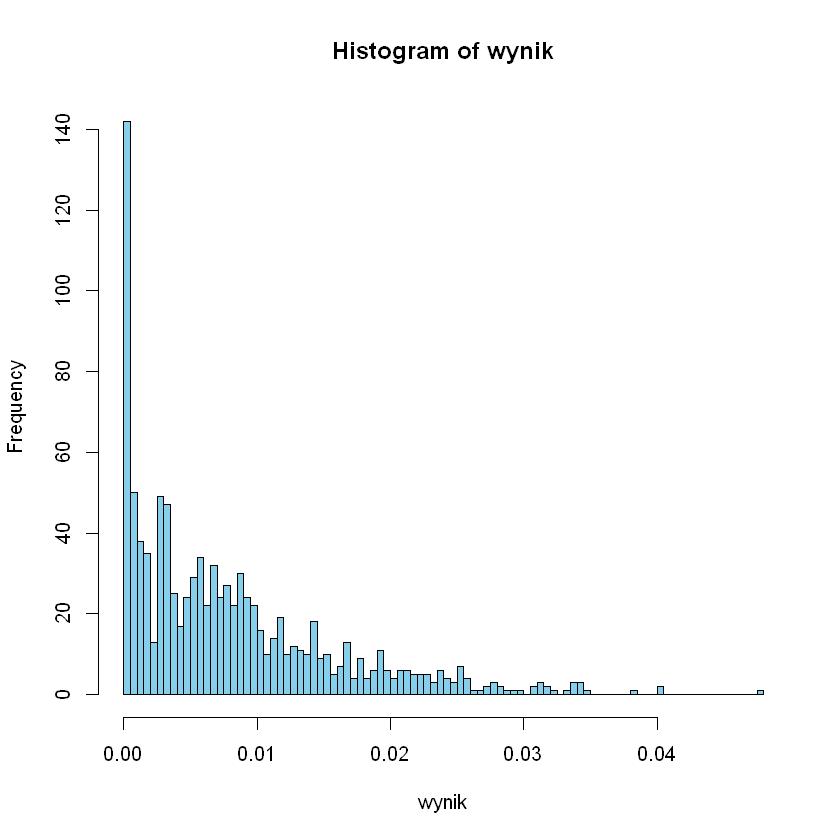

In [29]:
w<-5 # wiersze
k<-3 # kolumny
wynik<-c()
for (i in 1:1000) { 
    proba<-table(sample( x = 1:(w*k), size = 1000, replace = TRUE, prob =as.vector(niezaleznosc) ))
    matryca<-rep(0,(w*k))
    names(matryca)<-1:(w*k)
    matryca[names(matryca)%in%names(proba)]<-proba
    proba<-matrix(matryca, w, k)
    wynik[i]<-OMEGA_MDA(proba/sum(proba))   
}
niezaleznosc_brzegowy
hist( wynik, 100, col="skyblue")


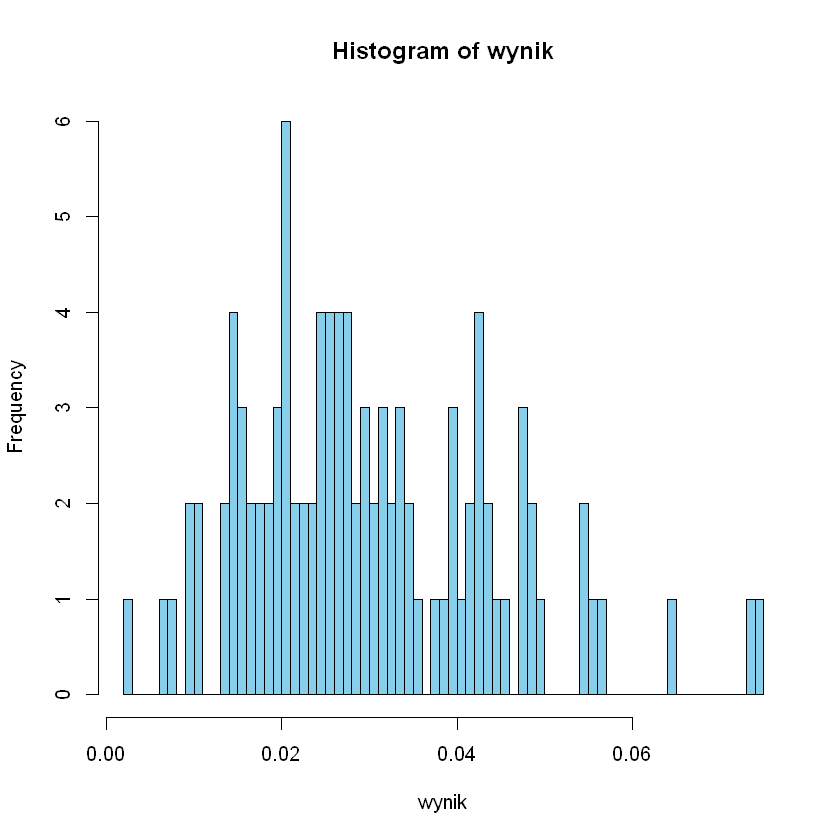

In [30]:
# losowa macierz
w<-5 # wiersze
k<-3 # kolumny
wynik<-c()
for (i in 1:100) { 
    proba<-table(sample( x = 1:(w*k), size = 1000, replace = TRUE ))
    matryca<-rep(0,(w*k))
    names(matryca)<-1:(w*k)
    matryca[names(matryca)%in%names(proba)]<-proba
    proba<-matrix(matryca, w, k)
    #print(proba)
    wynik[i]<-OMEGA_MDA(proba/sum(proba))   
}
hist( wynik, 100, col="skyblue")

# 5. Interpretacja nowej miary zależności


Najważniejsza jest jednak interpretacja miary zależności ωX|Y, która stanowi jej podstawowe uzasadnienie.
Inspiracja do interpretacji miary zależności ma dwa źródła. Pierwszym jest miara proporcjonalnej predykcji (Goodman, L.A. i Kruskal, W,H. 1954. Measures of association for cross classifications. “Journal of the American Statistical Association” 49: 732-764, zwłaszcza strony 759-760), a drugim - interpretacja współczynnika koncentracji Gini w kategoriach gry (Pyatt, G. 1976. On the interpretation and disaggregation of Gini coefficient. “The Economic Journal” 86: 243-255).

Najważniejsza jest jednak interpretacja miary zależności ωX|Y, która stanowi jej podstawowe uzasadnienie.
Inspiracja do interpretacji miary zależności ma dwa źródła. Pierwszym jest miara proporcjonalnej predykcji (Goodman, L.A. i Kruskal, W,H. 1954. Measures of association for cross classifications. “Journal of the American Statistical Association” 49: 732-764, zwłaszcza strony 759-760), a drugim - interpretacja współczynnika koncentracji Gini w kategoriach gry (Pyatt, G. 1976. On the interpretation and disaggregation of Gini coefficient. “The Economic Journal” 86: 243-255).

## 5.1. Interpretacja 1

Postawmy sobie zadanie polegające na „odgadywaniu” wartości zmiennej X. W tym celu przypiszmy losowo obiektom w zbiorowości różne wartości $x_i$ z prawdopodobieństwami równymi częstościom P(X=xi), z jakimi występują w tej zbiorowości.Częstość popełniania błędu przy tym przewidywaniu jest określona za pomocą parametru nazywanego różnorodnością klasyfikacji.

$$K(X)= 1 - \sum_{x_i \in X} P (X = x_i)^2$$

Jeżeli przewidujemy na podstawie informacji, że obiekt ma wartość zmiennej Y równą y_g, to warunkowa częstość popełniania błędu jest równa:

$$K(X|Y=y_g)= 1 - \sum_{x_i \in X} P (X = x_i|Y=y_g)^2$$

Miara zależności statystycznej zmiennej X od zmiennej Y w sensie proporcjonalnej predykcji ma postać:

$$\tau_X = \frac{K(X)-E(K(X|Y)) }{K(X)} $$

## 5.1. Interpretacja 2

Graham Pyatt sformułował interesującą interpretację współczynnika koncentracji Gini w postaci gry czy też eksperymentu. Dla każdej jednostki o określonym dochodzie wybiera się losowo dochód z prawdopodobieństwami określonymi w rozkładzie dochodów w danej populacji. Jeżeli aktualny dochód jednostki jest niższy od wybranego losowo dochodu, to otrzymuje ona dochód wylosowany, a jeżeli jest wyższy od wylosowanego, to zachowuje ona swój aktualny dochód. Współczynnik koncentracji Gini ma interpretację jako wartość oczekiwana zysku w tej grze, tj. średnia wielkość zwiększenia dochodów. 

$$G = \frac{\frac{1}{n^2} \sum_{i=1}^n \sum_{k=1}^n max(0, x_i-x_k)}{ \frac{1}{n} \sum_{i=1}^n x_i  }$$

gdzie wartości zmiennej X oznaczają dochody jednostek.

Kategorie zmiennej X są uporządkowane ze względu na częstość ich wyborów w danej zbiorowości: od kategorii wybieranej najczęściej $x_1$, do kategorii najrzadziej wybieranej $x_n$.

Częstości skumulowane do kategorii xi będziemy oznaczali przez $F_x (x_j)$ tj.:

$$F_x(x_i) = \sum_{k=1}^i P(X = x_k)$$

Analog średniej różnicy MDA można przedstawić w innej postaci.

$$MDA(X) = \frac{2( \sum_{i=1}^n i P(X=x_i) -1) }{n-1}=\frac{2( \sum_{i=1}^n F_x(X=x_i) -1) }{n-1}=\frac{2( \sum_{i=1}^{n-1} F_x(X=x_i)) }{n-1} $$


Porównajmy jednostkę __a__ należącą do kategorii $x_i$ z jednostką __b__ należącą do kategorii $x_k$. Niech ocena tego porównania będzie równa 0, gdy jednostka __a__ należy do kategorii wybieranej częściej lub równie często jak kategoria do której należy jednostka __b__ oraz równa 1, gdy jednostka __a__ należy do kategorii wybieranej rzadziej od kategorii do której należy jednostka __b__. Zasadę tą zapisujemy w następujący sposób:

$$ l(a,b) =
  \begin{cases}
    0  \quad gdy \quad X(a)=x_i \wedge X(b)=x_k \wedge (i \leq k)   \\
    1  \quad gdy \quad X(a)=x_i \wedge X(b)=x_k \wedge (i > k)    \\
  \end{cases}
$$

Ocena ta jest więc oceną braku zgodności z uporządkowaniem kategorii wyznaczonym przez częstości ich wyborów.

Porównując całe kategorie $x_i$ oraz $x_k$ otrzymujemy:

$$ l(x_i,x_k) =
  \begin{cases}
    0  \quad  \quad \quad \quad  gdy \quad (i \leq k)   \\
    P(X=x_k)  \quad gdy \quad (i > k)    \\
  \end{cases}
$$

Sumując te oceny po wszystkich kategoriach $x_k$ otrzymujemy:

$$\sum_{k=1}^n l(x_i,x_k) = \sum_{k=1}^i P(X=x_k) = F_x(x_i)$$ 

Wyjaśnijmy przy tym, że: 

$$F_x(x_i)=\sum_{k=1}^i P(X=x_k)$$ 

| i | $ip_i$| | | | | | | | 
|---|------|-|-|-|-|-|-|-|
|  1|$1p_1$|$p_1$|||$\cdots$|||$F_x(x_1)$|
|  2|$2p_2$|$p_2$|$p_2$||$\cdots$|||$F_x(x_2)$|
|  3|$3p_3$|$p_3$|$p_3$|$p_3$|$\cdots$|||$F_x(x_3)$|
| $ \cdots$|$ \cdots$|$ \cdots$|$ \cdots$|$ \cdots$|$\cdots$|$\cdots$|$\cdots$|$\cdots$|
| $n-1$ |$(n-1)p_{n-1}$|$p_{n-1}$|$p_{n-1}$|$p_{n-1}$|$\cdots$|$p_{n-1}$||$F_x(x_{n-1})$|
| $n$ |$np_n$|$p_n$|$p_n$|$p_n$|$\cdots$|$p_n$|$p_n$|$F_x(x_n)$|

Możemy użyć tej własności w odniesieniu do miary MDA i zapisać ją w następujący sposób:

$$MDA(X)= \frac{2(\sum_{i=2}^n F_x(x_i)) }{n-1}$$

Analog średniej różnicy MDA jest funkcją oceny braku zgodności w rozkładzie zmiennej X z uporządkowaniem kategorii wyznaczonym przez częstości ich wyborów.

Analogicznie dla rozkładu warunkowego zmiennej X pod warunkiem, że zmienna Y przyjmuje wartość y_g.

$$MDA(X|Y=y_g)= \frac{2(\sum_{i=2}^n F_{X|Y=y_g}(x_i)) }{n-1}$$

Zatem

$$\omega_{X|Y} = \frac{MDA(X)-E(MDA(X|Y))}{MDA(X)}= \frac{ \frac{2(\sum_{i=2}^n F_X(x_i)) }{n-1}-\sum_{g=1}^G P(Y=y_g)\frac{2(\sum_{i=2}^n F_{X|Y=y_g}(x_i)) }{n-1}}{\frac{2(\sum_{i=2}^n F_X(x_i)) }{n-1}} = \frac{ \sum_{i=2}^n F_X(x_i)- 
\sum_{g=1}^G P(Y-y_g)\sum_{i=2}^n F_{X|Y=y_g(x_i)})            }{\sum_{i=2}^n F_X(x_i)}$$

Wartość tej miary oznacza stopień redukcji oceny braku zgodności w rozkładzie zmiennej X z uporządkowaniem kategorii wyznaczonym przez częstości ich wyborów w wyniku tego, że wykorzystana została informacja o wartości zmiennej Y.


# 6. Bibliografia

 * Allison, Paul D. 1978. Measures of inequality. “American Sociological Review” 43: 865-80.
 * Allison, Paul D. 1979. Reply to Jasso. “American Sociological Review” 44: 870-872.
 * Ceriani, Lidia; Verme Paolo. 2012. The origins of the Gini index: extracts from «Variabilità and Mutabilità» by Corrado Gini. “Journal of Economic Inequality” 10: 421-443.
 * Coulter, Philip B. 1989. Measurement Inequality. A Methodological Handbook. Boulder: Westview Press.
 * David, H.A. 1968. Gini’s mean difference rediscovered. “Biometrika” 55: 573-575.
 * Goodman, Leo A., Kruskal, William H. 1954. Measures of association for cross classifications. “Journal of the American Statistical Association” 49: 732-764.
 * Jasso, Guillermina. 1979. On Gini's mean difference and Gini's index of concentration. “American Sociological Review” 44: 867-870.
 * Kendall, Maurice G.; Stuart, Alan. 1958. The Advanced Theory of Statistics. Vol. I. New York: Hafner Publishing Co.
 * Pyatt, Graham. 1976. On the interpretation and disaggregation of Gini coefficient. “The Economic Journal” 86: 243-255.
 * Ray, James L.; Singer, David. 1973. Measuring the concentration of power in the international system. “Sociological Methods and Research” 1: 403-437.
 * Santos, Jesús Busulto; Guerrero, J. Javier Busto. 2010. Gini’s concentration ratio (1908-1914). “Electronic Journal for History of Probability and Statistics” 6: 1-42.
 * Tschuprov, Alexander A. 1939. Principles of the Mathematical Theory of Correlation. London: W. Hodge. Pierwsze wydanie w języku niemieckim w 1925 r.
 * Yitzhaki, Shlomo. 2013. More Than a Dozen Alternative Ways of Spelling Gini. W: Yitzhaki, Shlomo; Schechtman, Edna (red.) The Gini Methodology: A Primer on a Statistical Methodology. Chapter 2. Springer Series in Statistics 272, New York: Springer.
 * Wilcox, Allen R. 1973. Indices of qualitative variation and political measurement. “Western Political Quarterly” 26: 325-343.